In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [37]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torch.optim import Adam
from torch.optim.lr_scheduler import StepLR, ExponentialLR

import geoopt
from geoopt.optim import RiemannianAdam

In [38]:
from models import *
from losses import *
from utils import *
from trainer import MetricTrainer
from dataset import PariwiseDataset

In [39]:
cfg = dotdict()
cfg['bs'] = 512
cfg['lr'] = 1e-3
cfg['neg_samples'] = 10
cfg['embedding_dim'] = 256
cfg['margin'] = 0.5
cfg['lam'] = 1
cfg['step_size'] = 10
cfg['max_norm'] = 1
cfg['drop_rate'] = 0
cfg['weighted'] = False

In [40]:
import script

bs:            512
lr:            0.01
neg_samples:   10
embedding_dim: 64
margin:        0.3
lam:           1
step_size:     10
max_norm:      1
drop_rate:     0
weighted:      False


  0%|          | 0/50 [00:00<?, ?it/s]

epoch: 1


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.2090953981689134
--------------------------------------------------------------------------------
epoch: 2


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.168783306451368
--------------------------------------------------------------------------------
epoch: 3


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.154254296687261
--------------------------------------------------------------------------------
epoch: 4


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.136763293081553
--------------------------------------------------------------------------------
epoch: 5


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.119291161991539
--------------------------------------------------------------------------------
epoch: 6


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.1039138526816643
--------------------------------------------------------------------------------
epoch: 7


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.0909433427281403
--------------------------------------------------------------------------------
epoch: 8


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.0807197131411566
--------------------------------------------------------------------------------
epoch: 9


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.072353193273095
--------------------------------------------------------------------------------
epoch: 10


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.0657158434703087
--------------------------------------------------------------------------------
epoch: 11


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.0596494674682617
--------------------------------------------------------------------------------
epoch: 12


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.054686379058199
--------------------------------------------------------------------------------
epoch: 13


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.0502060682985794
--------------------------------------------------------------------------------
epoch: 14


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.0467347075177735
--------------------------------------------------------------------------------
epoch: 15


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.0433278320971584
--------------------------------------------------------------------------------
epoch: 16


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.0401965698022493
--------------------------------------------------------------------------------
epoch: 17


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.0376472385765996
--------------------------------------------------------------------------------
epoch: 18


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.035368174158466
--------------------------------------------------------------------------------
epoch: 19


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.0331861660742634
--------------------------------------------------------------------------------
epoch: 20


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.031294682887212
--------------------------------------------------------------------------------
epoch: 21


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.0295157145455245
--------------------------------------------------------------------------------
epoch: 22


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.0280142629333815
--------------------------------------------------------------------------------
epoch: 23


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.0266839896197095
--------------------------------------------------------------------------------
epoch: 24


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.025387510579294
--------------------------------------------------------------------------------
epoch: 25


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.024097869533519
--------------------------------------------------------------------------------
epoch: 26


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.0230225979969765
--------------------------------------------------------------------------------
epoch: 27


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.0219470630765586
--------------------------------------------------------------------------------
epoch: 28


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.0209031105041504
--------------------------------------------------------------------------------
epoch: 29


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.020145380060086
--------------------------------------------------------------------------------
epoch: 30


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.019355919972764
--------------------------------------------------------------------------------
epoch: 31


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.018513534705676
--------------------------------------------------------------------------------
epoch: 32


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.0179028947940045
--------------------------------------------------------------------------------
epoch: 33


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.0172787299330945
--------------------------------------------------------------------------------
epoch: 34


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.0165809773649843
--------------------------------------------------------------------------------
epoch: 35


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.016039919478731
--------------------------------------------------------------------------------
epoch: 36


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.015573475373353
--------------------------------------------------------------------------------
epoch: 37


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.0151678492261476
--------------------------------------------------------------------------------
epoch: 38


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.0148606637385504
--------------------------------------------------------------------------------
epoch: 39


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.0145474516284403
--------------------------------------------------------------------------------
epoch: 40


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.014336733293783
--------------------------------------------------------------------------------
epoch: 41


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.014060056646457
--------------------------------------------------------------------------------
epoch: 42


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.0139024919240263
--------------------------------------------------------------------------------
epoch: 43


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.013707832516176
--------------------------------------------------------------------------------
epoch: 44


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.0135314177468184
--------------------------------------------------------------------------------
epoch: 45


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.0134185146910983
--------------------------------------------------------------------------------
epoch: 46


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.0133020940251374
--------------------------------------------------------------------------------
epoch: 47


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.0131502163971904
--------------------------------------------------------------------------------
epoch: 48


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.012983770270622
--------------------------------------------------------------------------------
epoch: 49


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.0129204021074383
--------------------------------------------------------------------------------
epoch: 50


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.012969644906009


  0%|          | 0/1 [00:00<?, ?it/s]

valid_loss: 2.1391515731811523
valid_hitrate: 1189/2447
valid_ndcg: 682.8/2447
--------------------------------------------------------------------------------
bs:            512
lr:            0.01
neg_samples:   10
embedding_dim: 64
margin:        0.4
lam:           1
step_size:     10
max_norm:      1
drop_rate:     0
weighted:      False


  0%|          | 0/50 [00:00<?, ?it/s]

epoch: 1


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.2904602894608264
--------------------------------------------------------------------------------
epoch: 2


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.2298950162857616
--------------------------------------------------------------------------------
epoch: 3


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.2161429178028205
--------------------------------------------------------------------------------
epoch: 4


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.1995989639721616
--------------------------------------------------------------------------------
epoch: 5


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.1807766971787856
--------------------------------------------------------------------------------
epoch: 6


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.163334174930113
--------------------------------------------------------------------------------
epoch: 7


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.1473320504133615
--------------------------------------------------------------------------------
epoch: 8


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.1329909307170287
--------------------------------------------------------------------------------
epoch: 9


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.1211471507686595
--------------------------------------------------------------------------------
epoch: 10


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.1110146482577496
--------------------------------------------------------------------------------
epoch: 11


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.1020930462482714
--------------------------------------------------------------------------------
epoch: 12


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.094420942336477
--------------------------------------------------------------------------------
epoch: 13


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.0875359592637466
--------------------------------------------------------------------------------
epoch: 14


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.0813923855726633
--------------------------------------------------------------------------------
epoch: 15


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.075950063335958
--------------------------------------------------------------------------------
epoch: 16


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.0710652898119384
--------------------------------------------------------------------------------
epoch: 17


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.0667537556892914
--------------------------------------------------------------------------------
epoch: 18


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.0629045563842614
--------------------------------------------------------------------------------
epoch: 19


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.0593421596507127
--------------------------------------------------------------------------------
epoch: 20


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.055853702635041
--------------------------------------------------------------------------------
epoch: 21


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.0528595559884115
--------------------------------------------------------------------------------
epoch: 22


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.0501299091658667
--------------------------------------------------------------------------------
epoch: 23


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.0475370134982764
--------------------------------------------------------------------------------
epoch: 24


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.0452109606478226
--------------------------------------------------------------------------------
epoch: 25


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.0431417345376537
--------------------------------------------------------------------------------
epoch: 26


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.041271393211724
--------------------------------------------------------------------------------
epoch: 27


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.0395255750386503
--------------------------------------------------------------------------------
epoch: 28


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.03801231858618
--------------------------------------------------------------------------------
epoch: 29


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.0366265848669083
--------------------------------------------------------------------------------
epoch: 30


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.0354140379041903
--------------------------------------------------------------------------------
epoch: 31


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.0344807677244017
--------------------------------------------------------------------------------
epoch: 32


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.033900234711732
--------------------------------------------------------------------------------
epoch: 33


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.0330076242616664
--------------------------------------------------------------------------------
epoch: 34


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.032418328430016
--------------------------------------------------------------------------------
epoch: 35


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.03196103660224
--------------------------------------------------------------------------------
epoch: 36


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.031398057937622
--------------------------------------------------------------------------------
epoch: 37


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.0311149240164235
--------------------------------------------------------------------------------
epoch: 38


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.030732621697231
--------------------------------------------------------------------------------
epoch: 39


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.0302218117639033
--------------------------------------------------------------------------------
epoch: 40


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.0300696732486108
--------------------------------------------------------------------------------
epoch: 41


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.02954310646856
--------------------------------------------------------------------------------
epoch: 42


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.0294890353816966
--------------------------------------------------------------------------------
epoch: 43


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.0289711590212676
--------------------------------------------------------------------------------
epoch: 44


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.0286637987765967
--------------------------------------------------------------------------------
epoch: 45


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.028527581878982
--------------------------------------------------------------------------------
epoch: 46


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.0282216022151927
--------------------------------------------------------------------------------
epoch: 47


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.0280071615548656
--------------------------------------------------------------------------------
epoch: 48


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.027969024568328
--------------------------------------------------------------------------------
epoch: 49


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.027700901031494
--------------------------------------------------------------------------------
epoch: 50


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.027516939253083


  0%|          | 0/1 [00:00<?, ?it/s]

valid_loss: 2.1879472732543945
valid_hitrate: 1238/2447
valid_ndcg: 710.51/2447
--------------------------------------------------------------------------------
bs:            512
lr:            0.01
neg_samples:   10
embedding_dim: 64
margin:        0.5
lam:           1
step_size:     10
max_norm:      1
drop_rate:     0
weighted:      False


  0%|          | 0/50 [00:00<?, ?it/s]

epoch: 1


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.3779443558598063
--------------------------------------------------------------------------------
epoch: 2


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.2927354667823354
--------------------------------------------------------------------------------
epoch: 3


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.2839525232764437
--------------------------------------------------------------------------------
epoch: 4


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.2749906310236265
--------------------------------------------------------------------------------
epoch: 5


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.2616114928460247
--------------------------------------------------------------------------------
epoch: 6


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.2444819555232662
--------------------------------------------------------------------------------
epoch: 7


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.2263531697358134
--------------------------------------------------------------------------------
epoch: 8


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.2081621117616823
--------------------------------------------------------------------------------
epoch: 9


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.191976215202771
--------------------------------------------------------------------------------
epoch: 10


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.1770876252838454
--------------------------------------------------------------------------------
epoch: 11


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.1631427410385373
--------------------------------------------------------------------------------
epoch: 12


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.1513597103937756
--------------------------------------------------------------------------------
epoch: 13


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.140921907275135
--------------------------------------------------------------------------------
epoch: 14


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.1317247420705425
--------------------------------------------------------------------------------
epoch: 15


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.1233727095638892
--------------------------------------------------------------------------------
epoch: 16


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.1160483048224323
--------------------------------------------------------------------------------
epoch: 17


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.1097105385745385
--------------------------------------------------------------------------------
epoch: 18


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.1033908484493873
--------------------------------------------------------------------------------
epoch: 19


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.0971488965119365
--------------------------------------------------------------------------------
epoch: 20


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.092361189307967
--------------------------------------------------------------------------------
epoch: 21


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.0873496944367576
--------------------------------------------------------------------------------
epoch: 22


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.0832202397091852
--------------------------------------------------------------------------------
epoch: 23


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.0793442451516997
--------------------------------------------------------------------------------
epoch: 24


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.0757480004695075
--------------------------------------------------------------------------------
epoch: 25


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.072610272162872
--------------------------------------------------------------------------------
epoch: 26


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.0699884579443806
--------------------------------------------------------------------------------
epoch: 27


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.0678968591839855
--------------------------------------------------------------------------------
epoch: 28


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.0657222670410316
--------------------------------------------------------------------------------
epoch: 29


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.064172335320118
--------------------------------------------------------------------------------
epoch: 30


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.06283556229157
--------------------------------------------------------------------------------
epoch: 31


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.0614489373112224
--------------------------------------------------------------------------------
epoch: 32


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.0604471249106044
--------------------------------------------------------------------------------
epoch: 33


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.059310211561113
--------------------------------------------------------------------------------
epoch: 34


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.0586579370249005
--------------------------------------------------------------------------------
epoch: 35


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.05755900837364
--------------------------------------------------------------------------------
epoch: 36


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.056883657165847
--------------------------------------------------------------------------------
epoch: 37


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.056142919350669
--------------------------------------------------------------------------------
epoch: 38


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.055213863312886
--------------------------------------------------------------------------------
epoch: 39


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.0548899360976294
--------------------------------------------------------------------------------
epoch: 40


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.0542762778816424
--------------------------------------------------------------------------------
epoch: 41


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.0538631459181222
--------------------------------------------------------------------------------
epoch: 42


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.0531476729827403
--------------------------------------------------------------------------------
epoch: 43


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.0528560046750215
--------------------------------------------------------------------------------
epoch: 44


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.052274491774474
--------------------------------------------------------------------------------
epoch: 45


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.051708094112536
--------------------------------------------------------------------------------
epoch: 46


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.0514090934973113
--------------------------------------------------------------------------------
epoch: 47


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.051195105957111
--------------------------------------------------------------------------------
epoch: 48


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.050611379883052
--------------------------------------------------------------------------------
epoch: 49


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.050499797491503
--------------------------------------------------------------------------------
epoch: 50


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.050277538948658


  0%|          | 0/1 [00:00<?, ?it/s]

valid_loss: 2.2342019081115723
valid_hitrate: 1308/2447
valid_ndcg: 756.45/2447
--------------------------------------------------------------------------------
bs:            512
lr:            0.01
neg_samples:   10
embedding_dim: 64
margin:        0.6
lam:           1
step_size:     10
max_norm:      1
drop_rate:     0
weighted:      False


  0%|          | 0/50 [00:00<?, ?it/s]

epoch: 1


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.468121508653251
--------------------------------------------------------------------------------
epoch: 2


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.3559597299985238
--------------------------------------------------------------------------------
epoch: 3


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.3425689979373474
--------------------------------------------------------------------------------
epoch: 4


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.335105244401862
--------------------------------------------------------------------------------
epoch: 5


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.330409453177327
--------------------------------------------------------------------------------
epoch: 6


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.327329638116647
--------------------------------------------------------------------------------
epoch: 7


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.3255394528673583
--------------------------------------------------------------------------------
epoch: 8


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.3251110209220367
--------------------------------------------------------------------------------
epoch: 9


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.3243755370534527
--------------------------------------------------------------------------------
epoch: 10


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.3238286223087012
--------------------------------------------------------------------------------
epoch: 11


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.323234927591853
--------------------------------------------------------------------------------
epoch: 12


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.3233510424329347
--------------------------------------------------------------------------------
epoch: 13


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.3226268640987535
--------------------------------------------------------------------------------
epoch: 14


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.32245985625302
--------------------------------------------------------------------------------
epoch: 15


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.3223991294181783
--------------------------------------------------------------------------------
epoch: 16


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.3223717811844113
--------------------------------------------------------------------------------
epoch: 17


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.322814621850458
--------------------------------------------------------------------------------
epoch: 18


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.3220643997192383
--------------------------------------------------------------------------------
epoch: 19


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.321754117286642
--------------------------------------------------------------------------------
epoch: 20


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.320970053448103
--------------------------------------------------------------------------------
epoch: 21


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.3210140485414037
--------------------------------------------------------------------------------
epoch: 22


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.3206401420513374
--------------------------------------------------------------------------------
epoch: 23


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.320668789728774
--------------------------------------------------------------------------------
epoch: 24


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.3195569502745625
--------------------------------------------------------------------------------
epoch: 25


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.3181395530700684
--------------------------------------------------------------------------------
epoch: 26


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.3140502550215
--------------------------------------------------------------------------------
epoch: 27


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.3010351345801228
--------------------------------------------------------------------------------
epoch: 28


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.2831262169084
--------------------------------------------------------------------------------
epoch: 29


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.2656912316826627
--------------------------------------------------------------------------------
epoch: 30


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.249133213652366
--------------------------------------------------------------------------------
epoch: 31


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.2333951945080184
--------------------------------------------------------------------------------
epoch: 32


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.2188564732436733
--------------------------------------------------------------------------------
epoch: 33


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.205047135577776
--------------------------------------------------------------------------------
epoch: 34


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.1922237386254118
--------------------------------------------------------------------------------
epoch: 35


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.1806550325523495
--------------------------------------------------------------------------------
epoch: 36


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.170597098884782
--------------------------------------------------------------------------------
epoch: 37


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.161106519049999
--------------------------------------------------------------------------------
epoch: 38


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.152551765841339
--------------------------------------------------------------------------------
epoch: 39


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.144618763349443
--------------------------------------------------------------------------------
epoch: 40


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.1376200733384536
--------------------------------------------------------------------------------
epoch: 41


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.1313782312483065
--------------------------------------------------------------------------------
epoch: 42


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.125617205784583
--------------------------------------------------------------------------------
epoch: 43


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.1207891958546266
--------------------------------------------------------------------------------
epoch: 44


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.117044649823174
--------------------------------------------------------------------------------
epoch: 45


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.113187943453564
--------------------------------------------------------------------------------
epoch: 46


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.11048904139334
--------------------------------------------------------------------------------
epoch: 47


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.1070494951377987
--------------------------------------------------------------------------------
epoch: 48


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.1047140603290178
--------------------------------------------------------------------------------
epoch: 49


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.102580976735859
--------------------------------------------------------------------------------
epoch: 50


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.1004454078474595


  0%|          | 0/1 [00:00<?, ?it/s]

valid_loss: 2.269564151763916
valid_hitrate: 1302/2447
valid_ndcg: 725.96/2447
--------------------------------------------------------------------------------


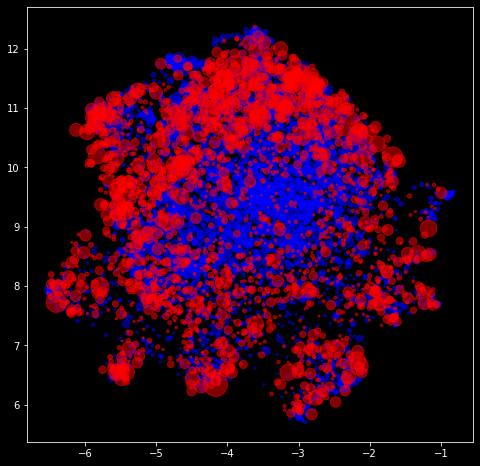

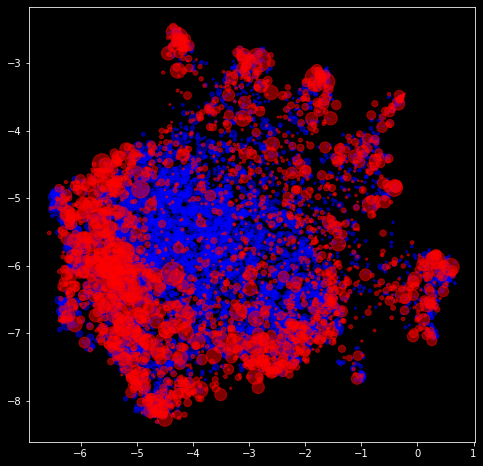

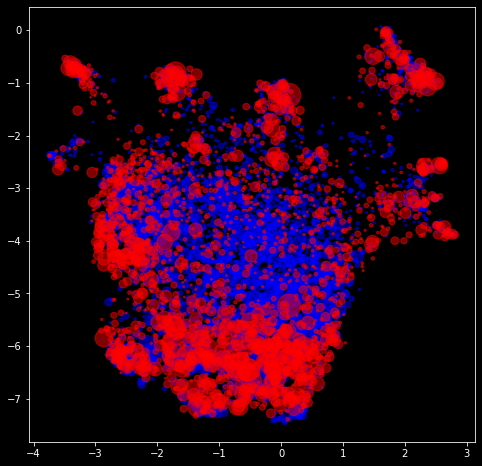

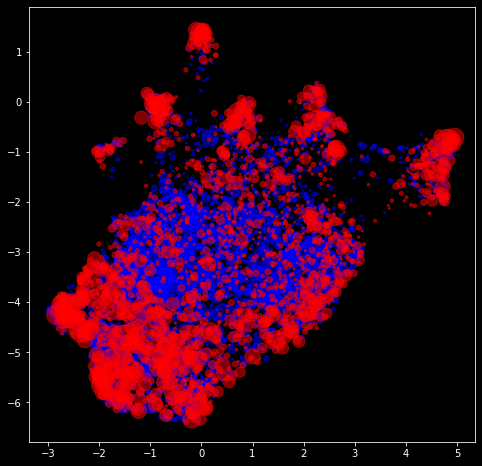

In [44]:
model = 'HyperCML'
for margin in [0.3, 0.4, 0.5, 0.6]:
    cfg['margin'] = margin
    for lr in [1e-2]:#, 1e-4
        cfg['lr'] = lr
        for emb in [64, 256]:
            cfg['embedding_dim'] = emb
            log = pd.read_csv('logs_test.txt')
            if log.loc[log['model'].eq(model) & log['lr'].eq(lr) & log['embedding_dim'].eq(emb) & log['margin'].eq(margin) & log['lam'].eq(cfg.lam)].empty:
                print(cfg)
                script.run(cfg, mode='test', model=model, epochs=50, num_workers=4)

In [6]:
model = 'CML'
for margin in [0.4, 0.5, 0.6]:
    cfg['margin'] = margin
    for lr in [1e-2, 1e-3]:#, 1e-4
        cfg['lr'] = lr
        for emb in [64, 256]:
            cfg['embedding_dim'] = emb
            log = pd.read_csv('logs_test.txt')
            if log.loc[log['model'].eq(model) & log['lr'].eq(lr) & log['embedding_dim'].eq(emb) & log['margin'].eq(margin) & log['lam'].eq(cfg.lam)].empty:
                print(cfg)
                script.run(cfg, mode='test', model=model, epochs=50, num_workers=4)

### manual

In [5]:
DATA = 'samokat'
SIZE = '100k'


if DATA == 'movielens':
    data = load_data(f'ml-{SIZE}')
    data_train, data_valid, data_test = train_test_split_single(data, how='last')
elif DATA == 'samokat':
    data = pd.read_csv(f'sk/data_{SIZE}.csv')
    data_train, data_valid, data_test = train_test_split_single(data, how='random')
    
    
N_USERS = data.user_id.nunique()
N_ITEMS = data.item_id.nunique()
user_sizes = data.groupby('user_id').count().item_id.to_numpy()
item_sizes = data.groupby('item_id').count().user_id.to_numpy()

In [ ]:
cfg = dotdict()
cfg['bs'] = 512
cfg['lr'] = 1e-2
cfg['neg_samples'] = 10
cfg['embedding_dim'] = 256
cfg['margin'] = 0.5
cfg['lam'] = 1
cfg['step_size'] = 10
cfg['max_norm'] = 1
cfg['drop_rate'] = 0
cfg['weighted'] = False

In [25]:
model = 'HyperCML'

train_set = PariwiseDataset(
    data_train, 
    N_USERS, 
    N_ITEMS, 
    neg_samples=cfg.neg_samples, 
    weights=(item_sizes if cfg.weighted else None))

valid_set = PariwiseDataset(data_valid, N_USERS, N_ITEMS, neg_samples=100)
test_set = PariwiseDataset(data_test, N_USERS, N_ITEMS, neg_samples=100)

train_loader = DataLoader(train_set, batch_size=cfg.bs, shuffle=True, num_workers=4)
valid_loader = DataLoader(valid_set, batch_size=N_USERS, shuffle=False)
test_loader = DataLoader(test_set, batch_size=N_USERS, shuffle=False)


if model == 'CML':
    metric_model = CML(N_USERS, N_ITEMS, embedding_dim=cfg.embedding_dim, dropout_rate=cfg.drop_rate, max_norm=cfg.max_norm)
    metric_criterion = AdditiveLoss(
        nn.TripletMarginLoss(margin=cfg.margin),
        CovarianceLoss(),
        coefficients=[1, cfg.lam]
    )

    metric_trainer = MetricTrainer(metric_model, metric_criterion)
    metric_trainer.optimizer = Adam(metric_trainer.model.parameters(), lr=cfg.lr)
elif model == 'HyperCML':
    manifold = geoopt.PoincareBall(c=1, learnable=True)
    metric_model = HyperCML(
        N_USERS, 
        N_ITEMS, 
        embedding_dim=cfg.embedding_dim, 
        dropout_rate=cfg.drop_rate,
        manifold=manifold, 
        max_norm=cfg.max_norm)
    metric_criterion = AdditiveLoss(
        nn.TripletMarginWithDistanceLoss(margin=cfg.margin, distance_function=manifold.dist),
        DistortionLoss(manifold=manifold),
        coefficients=[1, cfg.lam]
    )

    metric_trainer = MetricTrainer(metric_model, metric_criterion)
    metric_trainer.optimizer = RiemannianAdam(metric_trainer.model.parameters(), lr=cfg.lr)

In [26]:
metric_trainer.fit(train_loader, test_loader, epochs=50, plot=False, validate_every=50)
#fig = metric_trainer.plot_embeddings(item_sizes=item_sizes, user_sizes=user_sizes)
#figname = next(it)
#plt.savefig(f'images/{figname}')
full_hr = full_hit_rate(metric_trainer, valid_set, data_train)

row = ','.join(map(str, 
    [
        model, 
        cfg.embedding_dim, 
        cfg.margin, 
        cfg.lam, 
        cfg.lr,
        metric_trainer.logs['valid_epoch_loss'][-1], 
        int(metric_trainer.logs['valid_step_hits'][-1]), 
        metric_trainer.logs['valid_epoch_hitrate'][-1],
        metric_trainer.logs['valid_epoch_ndcg'][-1],
        full_hr,
        #figname
    ]
))

with open('logs_test.txt', 'a') as f:
    f.write(row)
    f.write('\n')

print(row)

  0%|          | 0/50 [00:00<?, ?it/s]

epoch: 1


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.3775553079175697
--------------------------------------------------------------------------------
epoch: 2


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.2925823908201686
--------------------------------------------------------------------------------
epoch: 3


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.283615062374095
--------------------------------------------------------------------------------
epoch: 4


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.2741375343961865
--------------------------------------------------------------------------------
epoch: 5


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.258916033500152
--------------------------------------------------------------------------------
epoch: 6


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.2410322359095067
--------------------------------------------------------------------------------
epoch: 7


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.222019251728557
--------------------------------------------------------------------------------
epoch: 8


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.2030522174236036
--------------------------------------------------------------------------------
epoch: 9


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.1861419939869986
--------------------------------------------------------------------------------
epoch: 10


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.17029130521245
--------------------------------------------------------------------------------
epoch: 11


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.15637891080367
--------------------------------------------------------------------------------
epoch: 12


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.144154990530763
--------------------------------------------------------------------------------
epoch: 13


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.13286616290427
--------------------------------------------------------------------------------
epoch: 14


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.12304026793435
--------------------------------------------------------------------------------
epoch: 15


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.114267734956991
--------------------------------------------------------------------------------
epoch: 16


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.1060117177314157
--------------------------------------------------------------------------------
epoch: 17


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.098693760277713
--------------------------------------------------------------------------------
epoch: 18


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.09212227391947
--------------------------------------------------------------------------------
epoch: 19


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.0860767077401046
--------------------------------------------------------------------------------
epoch: 20


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.0802182077737377
--------------------------------------------------------------------------------
epoch: 21


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.0748003739961156
--------------------------------------------------------------------------------
epoch: 22


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.07025953237923
--------------------------------------------------------------------------------
epoch: 23


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.065678793722422
--------------------------------------------------------------------------------
epoch: 24


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.062235391576877
--------------------------------------------------------------------------------
epoch: 25


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.059053226291197
--------------------------------------------------------------------------------
epoch: 26


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.0560246025704587
--------------------------------------------------------------------------------
epoch: 27


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.0538999497578407
--------------------------------------------------------------------------------
epoch: 28


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.0519960800390593
--------------------------------------------------------------------------------
epoch: 29


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.05018325126608
--------------------------------------------------------------------------------
epoch: 30


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.048964122203008
--------------------------------------------------------------------------------
epoch: 31


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.047935263648707
--------------------------------------------------------------------------------
epoch: 32


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.0468143280888103
--------------------------------------------------------------------------------
epoch: 33


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.0458171355162618
--------------------------------------------------------------------------------
epoch: 34


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.045053695508947
--------------------------------------------------------------------------------
epoch: 35


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.044297687670323
--------------------------------------------------------------------------------
epoch: 36


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.0435603638594064
--------------------------------------------------------------------------------
epoch: 37


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.042999036649135
--------------------------------------------------------------------------------
epoch: 38


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.0422862562209523
--------------------------------------------------------------------------------
epoch: 39


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.0418489066718135
--------------------------------------------------------------------------------
epoch: 40


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.0414068698883057
--------------------------------------------------------------------------------
epoch: 41


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.0407755399873744
--------------------------------------------------------------------------------
epoch: 42


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.0401684676165357
--------------------------------------------------------------------------------
epoch: 43


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.039965136513036
--------------------------------------------------------------------------------
epoch: 44


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.039819553884536
--------------------------------------------------------------------------------
epoch: 45


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.039470226976884
--------------------------------------------------------------------------------
epoch: 46


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.0389724139767793
--------------------------------------------------------------------------------
epoch: 47


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.0387695821792042
--------------------------------------------------------------------------------
epoch: 48


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.0384352781385653
--------------------------------------------------------------------------------
epoch: 49


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.038159560158615
--------------------------------------------------------------------------------
epoch: 50


  0%|          | 0/191 [00:00<?, ?it/s]

train_loss: 2.0380158187207127


  0%|          | 0/1 [00:00<?, ?it/s]

valid_loss: 2.252941370010376
valid_hitrate: 1348/2447
valid_ndcg: 762.82/2447
--------------------------------------------------------------------------------
HyperCML,256,0.5,1,0.01,2.252941370010376,1348,0.5508786268900695,0.3117366489898345,0.07029015120555783


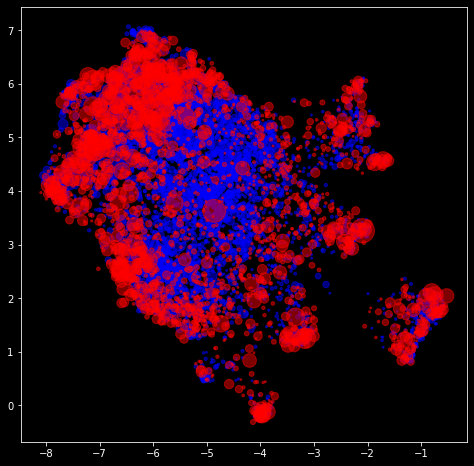

In [23]:
metric_trainer.plot_embeddings(item_sizes=item_sizes, user_sizes=user_sizes, algorithm='UMAP');

# ALS

In [15]:
import implicit
implicit.__version__

'0.5.2'

In [16]:
from implicit.als import AlternatingLeastSquares

In [18]:
DATA = 'samokat'
SIZE = '100k'


if DATA == 'movielens':
    data = load_data(f'ml-{SIZE}')
    data_train, data_valid, data_test = train_test_split_single(data, how='last')
elif DATA == 'samokat':
    data = pd.read_csv(f'sk/data_{SIZE}.csv')
    data_train, data_valid, data_test = train_test_split_single(data, how='random')
    
    
N_USERS = data.user_id.nunique()
N_ITEMS = data.item_id.nunique()
user_sizes = data.groupby('user_id').count().item_id.to_numpy()
item_sizes = data.groupby('item_id').count().user_id.to_numpy()

In [19]:
from scipy.sparse import csr_matrix

csr_data_train = csr_matrix((np.ones(data_train.shape[0]), (data_train.user_id, data_train.item_id)), shape=(N_USERS, N_ITEMS))
valid_ids = data_valid['item_id'].to_numpy()[:, None]
test_ids = data_test['item_id'].to_numpy()[:, None]

In [20]:
model = AlternatingLeastSquares(factors=16, regularization=0, iterations=100, random_state=1)
model.fit(csr_data_train)

D:\Work\samokat\venv\lib\site-packages\implicit\utils.py:26: UserWarning: OpenBLAS detected. Its highly recommend to set the environment variable 'export OPENBLAS_NUM_THREADS=1' to disable its internal multithreading
  warnings.warn(


  0%|          | 0/100 [00:00<?, ?it/s]

In [21]:
def _hit_rate_util(ids, scores, valid_ids, i, size=100):
    ids_1 = ids[i]
    scores_1 = scores[i]
    valid_id_1 = valid_ids[i][0]
    rated_scores = scores_1[scores_1>-1e+10]
    rated_ids = ids_1[scores_1>-1e+10] # filter already rated
    valid_index = np.where(rated_ids==valid_id_1)[0][0] # save valid one
    valid_id_ = rated_ids[valid_index]
    valid_score_ = rated_scores[valid_index]
    rated_ids_ = rated_ids[np.arange(len(rated_ids))!=valid_index] # remove valid one
    rated_scores_ = rated_scores[np.arange(len(rated_scores))!=valid_index]
    selected_indices = np.random.choice(len(rated_ids_), size=size, replace=False) # chose 100 random
    selected_ids = rated_ids_[selected_indices]
    selected_scores = rated_scores_[selected_indices]
    selected_ids_v = np.append(selected_ids, valid_id_)
    selected_scores_v = np.append(selected_scores, valid_score_)
    return valid_id_ in selected_ids_v[selected_scores_v.argsort()[::-1]][:10]

def hit_rate(ids, scores, valid_ids):
    hits = 0
    for i in range(valid_ids.shape[0]):
        hits += _hit_rate_util(ids, scores, valid_ids, i)
    return hits

In [22]:
ids, scores = model.recommend(np.arange(N_USERS), csr_data_train, N=N_ITEMS, filter_already_liked_items=True)
hits = hit_rate(ids, scores, valid_ids)
print(hits)
print(hits / N_USERS)

1242
0.5075602778912954


In [23]:
results_256 = []
for i in np.linspace(-5, 5, num=41):
    reg = 10**i
    print(f'regularization = 10^{i}:')
    model = AlternatingLeastSquares(factors=256, regularization=reg, iterations=100, random_state=1)
    model.fit(csr_data_train)
    ids, scores = model.recommend(np.arange(N_USERS), csr_data_train, N=N_ITEMS, filter_already_liked_items=True)
    hits = hit_rate(ids, scores, valid_ids)
    results_256.append(hits)
    print('hit_rate =', hits / N_USERS)
    print('-'*80)
    
results_64 = []
for i in np.linspace(-5, 5, num=41):
    reg = 10**i
    print(f'regularization = 10^{i}:')
    model = AlternatingLeastSquares(factors=64, regularization=reg, iterations=100, random_state=1)
    model.fit(csr_data_train)
    ids, scores = model.recommend(np.arange(N_USERS), csr_data_train, N=N_ITEMS, filter_already_liked_items=True)
    hits = hit_rate(ids, scores, valid_ids)
    results_64.append(hits)
    print('hit_rate =', hits / N_USERS)
    print('-'*80)
    
results_16 = []
for i in np.linspace(-5, 5, num=41):
    reg = 10**i
    print(f'regularization = 10^{i}:')
    model = AlternatingLeastSquares(factors=16, regularization=reg, iterations=100, random_state=1)
    model.fit(csr_data_train)
    ids, scores = model.recommend(np.arange(N_USERS), csr_data_train, N=N_ITEMS, filter_already_liked_items=True)
    hits = hit_rate(ids, scores, valid_ids)
    results_16.append(hits)
    print('hit_rate =', hits / N_USERS)
    print('-'*80)

regularization = 10^-5.0:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.38577850429096855
--------------------------------------------------------------------------------
regularization = 10^-4.75:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.38455251328156925
--------------------------------------------------------------------------------
regularization = 10^-4.5:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.38577850429096855
--------------------------------------------------------------------------------
regularization = 10^-4.25:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.38577850429096855
--------------------------------------------------------------------------------
regularization = 10^-4.0:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.3870044953003678
--------------------------------------------------------------------------------
regularization = 10^-3.75:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.38577850429096855
--------------------------------------------------------------------------------
regularization = 10^-3.5:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.38455251328156925
--------------------------------------------------------------------------------
regularization = 10^-3.25:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.38659583163056804
--------------------------------------------------------------------------------
regularization = 10^-3.0:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.38332652227217
--------------------------------------------------------------------------------
regularization = 10^-2.75:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.38291785860237026
--------------------------------------------------------------------------------
regularization = 10^-2.5:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.3861871679607683
--------------------------------------------------------------------------------
regularization = 10^-2.25:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.3812832039231712
--------------------------------------------------------------------------------
regularization = 10^-2.0:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.38659583163056804
--------------------------------------------------------------------------------
regularization = 10^-1.75:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.380057212913772
--------------------------------------------------------------------------------
regularization = 10^-1.5:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.3878218226399673
--------------------------------------------------------------------------------
regularization = 10^-1.25:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.38577850429096855
--------------------------------------------------------------------------------
regularization = 10^-1.0:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.38332652227217
--------------------------------------------------------------------------------
regularization = 10^-0.75:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.3861871679607683
--------------------------------------------------------------------------------
regularization = 10^-0.5:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.39476910502656315
--------------------------------------------------------------------------------
regularization = 10^-0.25:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.3931344503473641
--------------------------------------------------------------------------------
regularization = 10^0.0:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.3931344503473641
--------------------------------------------------------------------------------
regularization = 10^0.25:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.4021250510829587
--------------------------------------------------------------------------------
regularization = 10^0.5:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.41479362484675114
--------------------------------------------------------------------------------
regularization = 10^0.75:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.448304045770331
--------------------------------------------------------------------------------
regularization = 10^1.0:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.5018389865140989
--------------------------------------------------------------------------------
regularization = 10^1.25:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.526767470371884
--------------------------------------------------------------------------------
regularization = 10^1.5:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.428279525950143
--------------------------------------------------------------------------------
regularization = 10^1.75:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.4168369431957499
--------------------------------------------------------------------------------
regularization = 10^2.0:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.4213322435635472
--------------------------------------------------------------------------------
regularization = 10^2.25:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.1834899877400899
--------------------------------------------------------------------------------
regularization = 10^2.5:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.09562729873314263
--------------------------------------------------------------------------------
regularization = 10^2.75:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.2214957090314671
--------------------------------------------------------------------------------
regularization = 10^3.0:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.03841438496117695
--------------------------------------------------------------------------------
regularization = 10^3.25:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.21945239068246833
--------------------------------------------------------------------------------
regularization = 10^3.5:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.3391908459337965
--------------------------------------------------------------------------------
regularization = 10^3.75:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.37351859419697586
--------------------------------------------------------------------------------
regularization = 10^4.0:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.09848794442174091
--------------------------------------------------------------------------------
regularization = 10^4.25:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.4205149162239477
--------------------------------------------------------------------------------
regularization = 10^4.5:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.41888026154474867
--------------------------------------------------------------------------------
regularization = 10^4.75:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.21945239068246833
--------------------------------------------------------------------------------
regularization = 10^5.0:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.0723334695545566
--------------------------------------------------------------------------------
regularization = 10^-5.0:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.45811197384552516
--------------------------------------------------------------------------------
regularization = 10^-4.75:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.45974662852472414
--------------------------------------------------------------------------------
regularization = 10^-4.5:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.4564773191663261
--------------------------------------------------------------------------------
regularization = 10^-4.25:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.46178994687372293
--------------------------------------------------------------------------------
regularization = 10^-4.0:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.46505925623212097
--------------------------------------------------------------------------------
regularization = 10^-3.75:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.46710257458111976
--------------------------------------------------------------------------------
regularization = 10^-3.5:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.46505925623212097
--------------------------------------------------------------------------------
regularization = 10^-3.25:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.46873722926031874
--------------------------------------------------------------------------------
regularization = 10^-3.0:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.46097261953412344
--------------------------------------------------------------------------------
regularization = 10^-2.75:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.45688598283612586
--------------------------------------------------------------------------------
regularization = 10^-2.5:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.4662852472415202
--------------------------------------------------------------------------------
regularization = 10^-2.25:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.4613812832039232
--------------------------------------------------------------------------------
regularization = 10^-2.0:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.46056395586432364
--------------------------------------------------------------------------------
regularization = 10^-1.75:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.45974662852472414
--------------------------------------------------------------------------------
regularization = 10^-1.5:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.4572946465059256
--------------------------------------------------------------------------------
regularization = 10^-1.25:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.4601552921945239
--------------------------------------------------------------------------------
regularization = 10^-1.0:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.4662852472415202
--------------------------------------------------------------------------------
regularization = 10^-0.75:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.4564773191663261
--------------------------------------------------------------------------------
regularization = 10^-0.5:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.4585206375153249
--------------------------------------------------------------------------------
regularization = 10^-0.25:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.45688598283612586
--------------------------------------------------------------------------------
regularization = 10^0.0:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.46873722926031874
--------------------------------------------------------------------------------
regularization = 10^0.25:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.468328565590519
--------------------------------------------------------------------------------
regularization = 10^0.5:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.4711892112791173
--------------------------------------------------------------------------------
regularization = 10^0.75:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.4818144666939109
--------------------------------------------------------------------------------
regularization = 10^1.0:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.5002043318348999
--------------------------------------------------------------------------------
regularization = 10^1.25:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.5234981610134859
--------------------------------------------------------------------------------
regularization = 10^1.5:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.43277482631794034
--------------------------------------------------------------------------------
regularization = 10^1.75:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.423375561912546
--------------------------------------------------------------------------------
regularization = 10^2.0:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.4205149162239477
--------------------------------------------------------------------------------
regularization = 10^2.25:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.2496935022476502
--------------------------------------------------------------------------------
regularization = 10^2.5:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.09644462607274214
--------------------------------------------------------------------------------
regularization = 10^2.75:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.17981201471189212
--------------------------------------------------------------------------------
regularization = 10^3.0:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.044135676338373515
--------------------------------------------------------------------------------
regularization = 10^3.25:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.04004903964037597
--------------------------------------------------------------------------------
regularization = 10^3.5:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.4115243154883531
--------------------------------------------------------------------------------
regularization = 10^3.75:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.12627707396812424
--------------------------------------------------------------------------------
regularization = 10^4.0:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.17736003269309358
--------------------------------------------------------------------------------
regularization = 10^4.25:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.4213322435635472
--------------------------------------------------------------------------------
regularization = 10^4.5:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.4176542705353494
--------------------------------------------------------------------------------
regularization = 10^4.75:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.056804250102165915
--------------------------------------------------------------------------------
regularization = 10^5.0:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.12178177360032694
--------------------------------------------------------------------------------
regularization = 10^-5.0:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.5006129955046996
--------------------------------------------------------------------------------
regularization = 10^-4.75:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.5112382509194933
--------------------------------------------------------------------------------
regularization = 10^-4.5:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.5059256232120964
--------------------------------------------------------------------------------
regularization = 10^-4.25:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.5067429505516959
--------------------------------------------------------------------------------
regularization = 10^-4.0:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.5063342868818962
--------------------------------------------------------------------------------
regularization = 10^-3.75:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.5042909685328975
--------------------------------------------------------------------------------
regularization = 10^-3.5:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.5091949325704945
--------------------------------------------------------------------------------
regularization = 10^-3.25:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.5038823048630977
--------------------------------------------------------------------------------
regularization = 10^-3.0:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.5010216591744994
--------------------------------------------------------------------------------
regularization = 10^-2.75:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.5063342868818962
--------------------------------------------------------------------------------
regularization = 10^-2.5:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.5104209235798938
--------------------------------------------------------------------------------
regularization = 10^-2.25:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.5083776052308949
--------------------------------------------------------------------------------
regularization = 10^-2.0:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.5075602778912954
--------------------------------------------------------------------------------
regularization = 10^-1.75:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.5002043318348999
--------------------------------------------------------------------------------
regularization = 10^-1.5:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.5026563138536984
--------------------------------------------------------------------------------
regularization = 10^-1.25:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.5010216591744994
--------------------------------------------------------------------------------
regularization = 10^-1.0:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.5071516142214957
--------------------------------------------------------------------------------
regularization = 10^-0.75:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.5083776052308949
--------------------------------------------------------------------------------
regularization = 10^-0.5:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.505108295872497
--------------------------------------------------------------------------------
regularization = 10^-0.25:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.5145075602778912
--------------------------------------------------------------------------------
regularization = 10^0.0:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.5046996322026972
--------------------------------------------------------------------------------
regularization = 10^0.25:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.5096035962402943
--------------------------------------------------------------------------------
regularization = 10^0.5:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.513281569268492
--------------------------------------------------------------------------------
regularization = 10^0.75:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.5124642419288925
--------------------------------------------------------------------------------
regularization = 10^1.0:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.5140988966080915
--------------------------------------------------------------------------------
regularization = 10^1.25:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.5153248876174908
--------------------------------------------------------------------------------
regularization = 10^1.5:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.42991418062934206
--------------------------------------------------------------------------------
regularization = 10^1.75:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.42255823457294645
--------------------------------------------------------------------------------
regularization = 10^2.0:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.42868818961994276
--------------------------------------------------------------------------------
regularization = 10^2.25:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.16673477727829997
--------------------------------------------------------------------------------
regularization = 10^2.5:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.13240702901512055
--------------------------------------------------------------------------------
regularization = 10^2.75:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.04168369431957499
--------------------------------------------------------------------------------
regularization = 10^3.0:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.09440130772374336
--------------------------------------------------------------------------------
regularization = 10^3.25:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.03351042092357989
--------------------------------------------------------------------------------
regularization = 10^3.5:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.4160196158561504
--------------------------------------------------------------------------------
regularization = 10^3.75:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.03555373927257867
--------------------------------------------------------------------------------
regularization = 10^4.0:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.3011851246424193
--------------------------------------------------------------------------------
regularization = 10^4.25:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.423375561912546
--------------------------------------------------------------------------------
regularization = 10^4.5:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.4152022885165509
--------------------------------------------------------------------------------
regularization = 10^4.75:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.06783816918675929
--------------------------------------------------------------------------------
regularization = 10^5.0:


  0%|          | 0/100 [00:00<?, ?it/s]

hit_rate = 0.17940335104209235
--------------------------------------------------------------------------------


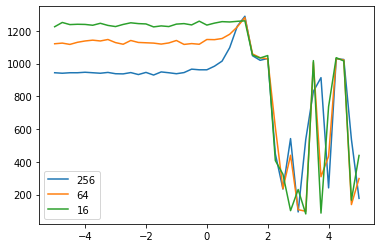

In [53]:
plt.plot(np.linspace(-5, 5, num=41), results_256, label='256')
plt.plot(np.linspace(-5, 5, num=41), results_64, label='64')
plt.plot(np.linspace(-5, 5, num=41), results_16, label='16')
plt.legend()

In [29]:
max(results_64) / N_USERS

0.5234981610134859

# table

In [69]:
logs_test = pd.read_csv('logs_test.txt').drop('hits', axis=1)

In [72]:
logs_test.sort_values('global_hit_rate', ascending=False)#global_

,model,embedding_dim,margin,lam,lr,loss,hit_rate,ndcg,global_hit_rate,image
0,HyperCML,256,0.3,1,0.010,2.158985,0.495300,0.278796,0.071107,0
1,HyperCML,256,0.4,1,0.010,2.212961,0.524315,0.299706,0.068247,1
2,HyperCML,256,0.5,1,0.010,2.258524,0.543523,0.309408,0.065386,2
8,CML,256,0.4,1,0.001,0.191869,0.555783,0.316572,0.064978,8
19,HyperCML,64,0.5,1,0.010,2.234202,0.534532,0.309132,0.062526,19
3,HyperCML,256,0.6,1,0.010,2.276103,0.541888,0.308401,0.058848,3
18,HyperCML,64,0.4,1,0.010,2.187947,0.505926,0.290358,0.057622,18
17,HyperCML,64,0.3,1,0.010,2.139152,0.485901,0.279034,0.054761,17
7,CML,64,0.4,1,0.001,0.188834,0.544749,0.316545,0.054761,7
11,CML,64,0.5,1,0.001,0.237075,0.557009,0.319595,0.051900,11


In [35]:
logs_test.sort_values('hit_rate', ascending=False).drop(['image', 'hits'], axis=1)

,model,embedding_dim,margin,lam,lr,loss,hit_rate,ndcg,full_hr
12,CML,256,0.5,1,0.001,0.235576,0.560687,0.316918,0.051492
11,CML,64,0.5,1,0.001,0.237075,0.557009,0.319595,0.051900
8,CML,256,0.4,1,0.001,0.191869,0.555783,0.316572,0.064978
16,CML,256,0.6,1,0.001,0.285522,0.552105,0.311267,0.047814
15,CML,64,0.6,1,0.001,0.288415,0.546383,0.306534,0.042092
7,CML,64,0.4,1,0.001,0.188834,0.544749,0.316545,0.054761
2,HyperCML,256,0.5,1,0.010,2.258524,0.543523,0.309408,0.065386
3,HyperCML,256,0.6,1,0.010,2.276103,0.541888,0.308401,0.058848
1,HyperCML,256,0.4,1,0.010,2.212961,0.524315,0.299706,0.068247
9,CML,64,0.5,1,0.010,0.242491,0.512873,0.278046,0.034736
